# General

In [126]:
# Imports
import numpy as np
import pandas as pd

import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [127]:
# Load data
pesticides_data = pd.read_csv('pesticides.csv')
rainfall_data = pd.read_csv('rainfall.csv')
temperature_data = pd.read_csv('temp.csv')
yield_data = pd.read_csv('yield.csv')

#Data Preparation


## Rainfall data

In [128]:
rainfall_data

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,55.7448,1901,Jan Average,Andhra Pradesh,AP
1,13.9480,1901,Feb Average,Andhra Pradesh,AP
2,43.8464,1901,Mar Average,Andhra Pradesh,AP
3,26.9610,1901,Apr Average,Andhra Pradesh,AP
4,52.9579,1901,May Average,Andhra Pradesh,AP
...,...,...,...,...,...
45931,250.7050,2016,Aug Average,Pondicherry,PY
45932,209.4400,2016,Sep Average,Pondicherry,PY
45933,139.2980,2016,Oct Average,Pondicherry,PY
45934,42.5671,2016,Nov Average,Pondicherry,PY


In [129]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45936 entries, 0 to 45935
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rainfall - (MM)  45936 non-null  float64
 1   Year             45936 non-null  int64  
 2   Statistics       45936 non-null  object 
 3   Country          45936 non-null  object 
 4   ISO3             45936 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.8+ MB


In [130]:
rainfall_data.describe()

,Rainfall - (MM),Year
count,45936.000000,45936.000000
mean,93.358733,1958.500000
std,99.149449,33.485436
min,0.000000,1901.000000
25%,23.508025,1929.750000
50%,59.870000,1958.500000
75%,134.696250,1987.250000
max,1012.020000,2016.000000


In [131]:
# Number of states
len(rainfall_data['Country'].unique())

33

In [132]:
# Number of years (1901 - 2016)
len(rainfall_data['Year'].unique())

116

In [133]:
# One year from Andhra Pradesh
rainfall_data.head(12)

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,55.74480,1901,Jan Average,Andhra Pradesh,AP
1,13.94800,1901,Feb Average,Andhra Pradesh,AP
2,43.84640,1901,Mar Average,Andhra Pradesh,AP
3,26.96100,1901,Apr Average,Andhra Pradesh,AP
4,52.95790,1901,May Average,Andhra Pradesh,AP
5,16.64650,1901,Jun Average,Andhra Pradesh,AP
6,7.38656,1901,Jul Average,Andhra Pradesh,AP
7,0.59306,1901,Aug Average,Andhra Pradesh,AP
8,4.82593,1901,Sep Average,Andhra Pradesh,AP
9,11.49720,1901,Oct Average,Andhra Pradesh,AP


In [134]:
# Rain data in years for each state
rainfall_df = rainfall_data.groupby(['Year', 'Country', 'ISO3'], as_index=False, axis=0).sum()
rainfall_df

<ipython-input-134-6a65a69a815c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rainfall_df = rainfall_data.groupby(['Year', 'Country', 'ISO3'], as_index=False, axis=0).sum()


,Year,Country,ISO3,Rainfall - (MM)
0,1901,Andaman and Nicobar Islands,AN,1841.53379
1,1901,Arunachal Pradesh,AR,1244.13740
2,1901,Assam,AS,113.45278
3,1901,Bihar,BR,871.31150
4,1901,Chandigarh,CH,1666.84240
...,...,...,...,...
3823,2016,West Bengal,WB,1445.20230
3824,2016,Andhra Pradesh,AP,338.97713
3825,2016,Goa,GA,2673.48730
3826,2016,Jharkhand,JH,461.41090


## Temperature data

In [135]:
temperature_data

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-0.03780,1901,Jan Average,Andhra Pradesh,AP
1,2.42348,1901,Feb Average,Andhra Pradesh,AP
2,9.36230,1901,Mar Average,Andhra Pradesh,AP
3,13.55640,1901,Apr Average,Andhra Pradesh,AP
4,18.15090,1901,May Average,Andhra Pradesh,AP
...,...,...,...,...,...
45931,24.69980,2016,Aug Average,Pondicherry,PY
45932,24.53350,2016,Sep Average,Pondicherry,PY
45933,25.22570,2016,Oct Average,Pondicherry,PY
45934,24.93380,2016,Nov Average,Pondicherry,PY


In [136]:
temperature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45936 entries, 0 to 45935
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature - (Celsius)  45936 non-null  float64
 1   Year                     45936 non-null  int64  
 2   Statistics               45936 non-null  object 
 3   Country                  45936 non-null  object 
 4   ISO3                     45936 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.8+ MB


In [137]:
temperature_data.describe()

,Temperature - (Celsius),Year
count,45936.000000,45936.000000
mean,18.308235,1958.500000
std,10.072043,33.485436
min,-30.167000,1901.000000
25%,13.145850,1929.750000
50%,21.620300,1958.500000
75%,25.554250,1987.250000
max,38.286200,2016.000000


In [138]:
# Number of states
len(temperature_data['Country'].unique())

33

In [139]:
# Number of years (1901 - 2016)
len(temperature_data['Year'].unique())

116

In [140]:
# One year from Andhra Pradesh
temperature_data.head(12)

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-0.03780,1901,Jan Average,Andhra Pradesh,AP
1,2.42348,1901,Feb Average,Andhra Pradesh,AP
2,9.36230,1901,Mar Average,Andhra Pradesh,AP
3,13.55640,1901,Apr Average,Andhra Pradesh,AP
4,18.15090,1901,May Average,Andhra Pradesh,AP
5,22.17270,1901,Jun Average,Andhra Pradesh,AP
6,25.37870,1901,Jul Average,Andhra Pradesh,AP
7,23.66520,1901,Aug Average,Andhra Pradesh,AP
8,19.46550,1901,Sep Average,Andhra Pradesh,AP
9,11.28370,1901,Oct Average,Andhra Pradesh,AP


In [141]:
# Average temperature data in years for each state
temperature_df =temperature_data.groupby(['Year', 'Country', 'ISO3'], as_index=False, axis=0).mean()
temperature_df

<ipython-input-141-00064c00c0a3>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temperature_df =temperature_data.groupby(['Year', 'Country', 'ISO3'], as_index=False, axis=0).mean()


,Year,Country,ISO3,Temperature - (Celsius)
0,1901,Andaman and Nicobar Islands,AN,27.180175
1,1901,Arunachal Pradesh,AR,11.030938
2,1901,Assam,AS,22.290008
3,1901,Bihar,BR,9.960649
4,1901,Chandigarh,CH,24.177675
...,...,...,...,...
3823,2016,West Bengal,WB,21.205258
3824,2016,Andhra Pradesh,AP,14.513565
3825,2016,Goa,GA,26.497758
3826,2016,Jharkhand,JH,12.507338



## Yield data

In [142]:
yield_data

,Domain,Country,Element,Item,Year,Unit,Value
0,Crops,Andhra Pradesh,Yield,Barley,1961,hg/ha,10800
1,Crops,Andhra Pradesh,Yield,Barley,1962,hg/ha,10800
2,Crops,Andhra Pradesh,Yield,Barley,1963,hg/ha,10800
3,Crops,Andhra Pradesh,Yield,Barley,1964,hg/ha,10857
4,Crops,Andhra Pradesh,Yield,Barley,1965,hg/ha,10857
...,...,...,...,...,...,...,...
45931,Crops,Pondicherry,Yield,Carrots and turnips,2019,hg/ha,301467
45932,Crops,Pondicherry,Yield,Cauliflowers and broccoli,1961,hg/ha,140007
45933,Crops,Pondicherry,Yield,Cauliflowers and broccoli,1962,hg/ha,140013
45934,Crops,Pondicherry,Yield,Cauliflowers and broccoli,1963,hg/ha,140000


In [143]:
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45936 entries, 0 to 45935
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Domain   45936 non-null  object
 1   Country  45936 non-null  object
 2   Element  45936 non-null  object
 3   Item     45936 non-null  object
 4   Year     45936 non-null  int64 
 5   Unit     45936 non-null  object
 6   Value    45936 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.5+ MB


In [144]:
yield_data.describe()

,Year,Value
count,45936.000000,4.593600e+04
mean,1992.305207,8.712908e+04
std,16.922450,1.028471e+05
min,1961.000000,0.000000e+00
25%,1978.000000,1.786075e+04
50%,1994.000000,4.900850e+04
75%,2007.000000,1.191438e+05
max,2019.000000,2.236842e+06


In [147]:
# Number of states
len(yield_data['Country'].unique())

33

In [148]:
# Number of years (1961 - 2019)
len(yield_data['Year'].unique())

59

In [149]:
# Remove unnecessary columns
yield_df = yield_data.drop(['Domain', 'Element'], axis=1)
yield_df

,Country,Item,Year,Unit,Value
0,Andhra Pradesh,Barley,1961,hg/ha,10800
1,Andhra Pradesh,Barley,1962,hg/ha,10800
2,Andhra Pradesh,Barley,1963,hg/ha,10800
3,Andhra Pradesh,Barley,1964,hg/ha,10857
4,Andhra Pradesh,Barley,1965,hg/ha,10857
...,...,...,...,...,...
45931,Pondicherry,Carrots and turnips,2019,hg/ha,301467
45932,Pondicherry,Cauliflowers and broccoli,1961,hg/ha,140007
45933,Pondicherry,Cauliflowers and broccoli,1962,hg/ha,140013
45934,Pondicherry,Cauliflowers and broccoli,1963,hg/ha,140000


## Pesticides data

In [150]:
pesticides_data

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Andhra Pradesh,Agricultural Use,Pesticides (total),1990,tonnes,121
1,Pesticides Use,Andhra Pradesh,Agricultural Use,Pesticides (total),1991,tonnes,121
2,Pesticides Use,Andhra Pradesh,Agricultural Use,Pesticides (total),1992,tonnes,121
3,Pesticides Use,Andhra Pradesh,Agricultural Use,Pesticides (total),1993,tonnes,121
4,Pesticides Use,Andhra Pradesh,Agricultural Use,Pesticides (total),1994,tonnes,201
...,...,...,...,...,...,...,...
975,Pesticides Use,Pondicherry,Agricultural Use,Pesticides (total),2014,tonnes,96
976,Pesticides Use,Pondicherry,Agricultural Use,Pesticides (total),2015,tonnes,96
977,Pesticides Use,Pondicherry,Agricultural Use,Pesticides (total),2016,tonnes,96
978,Pesticides Use,Pondicherry,Agricultural Use,Pesticides (total),2017,tonnes,96


In [151]:
pesticides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Domain   980 non-null    object
 1   Area     980 non-null    object
 2   Element  980 non-null    object
 3   Item     980 non-null    object
 4   Year     980 non-null    int64 
 5   Unit     980 non-null    object
 6   Value    980 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 53.7+ KB


In [152]:
pesticides_data.describe()

,Year,Value
count,980.000000,9.800000e+02
mean,2004.082653,5.788364e+04
std,8.329177,2.493071e+05
min,1990.000000,2.000000e+00
25%,1997.000000,4.200000e+01
50%,2004.000000,4.825000e+02
75%,2011.000000,8.279250e+03
max,2018.000000,1.815690e+06


In [153]:
# Number of states
len(pesticides_data['Area'].unique())

34

In [154]:
# Number of years (1990 - 2018)
len(pesticides_data['Year'].unique())

29

In [155]:
# Remove unnecessary columns
pesticides_df = pesticides_data.drop(['Domain', 'Element'], axis=1)
pesticides_df

,Area,Item,Year,Unit,Value
0,Andhra Pradesh,Pesticides (total),1990,tonnes,121
1,Andhra Pradesh,Pesticides (total),1991,tonnes,121
2,Andhra Pradesh,Pesticides (total),1992,tonnes,121
3,Andhra Pradesh,Pesticides (total),1993,tonnes,121
4,Andhra Pradesh,Pesticides (total),1994,tonnes,201
...,...,...,...,...,...
975,Pondicherry,Pesticides (total),2014,tonnes,96
976,Pondicherry,Pesticides (total),2015,tonnes,96
977,Pondicherry,Pesticides (total),2016,tonnes,96
978,Pondicherry,Pesticides (total),2017,tonnes,96


## Merging

In [156]:
rainfall_df.rename({'Rainfall - (MM)': 'Rainfall (mm)'}, axis=1, inplace=True)

In [157]:
temperature_df.rename({'Temperature - (Celsius)': 'Temperature (Celsius)'}, axis=1, inplace=True)

In [158]:
yield_df.rename({'Area': 'Country', 'Value': 'Yield (hg/ha)'}, axis=1, inplace=True)
yield_df.drop('Unit', axis=1, inplace=True)

In [159]:
pesticides_df.rename({'Area': 'Country', 'Value': 'Pesticides (tonnes)'}, axis=1, inplace=True)
pesticides_df.drop(['Unit', 'Item'], axis=1, inplace=True)

In [160]:
rain_temp_df = pd.merge(rainfall_df, temperature_df, on=['Country', 'Year', 'ISO3'])
rain_temp_yield_df = pd.merge(rain_temp_df, yield_df, on=['Country', 'Year'])
rain_temp_yield_pest_df = pd.merge(rain_temp_yield_df, pesticides_df, on=['Country', 'Year'])
rain_temp_yield_pest_df.drop('ISO3', axis=1, inplace=True)
data = rain_temp_yield_pest_df[['Year', 'Country', 'Item', 'Rainfall (mm)', 'Temperature (Celsius)', 'Pesticides (tonnes)', 'Yield (hg/ha)']]
data

,Year,Country,Item,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
0,1990,Andhra Pradesh,Barley,362.67030,13.484385,121,10537
1,1990,Andhra Pradesh,Maize,362.67030,13.484385,121,17582
2,1990,Andhra Pradesh,Potatoes,362.67030,13.484385,121,168421
3,1990,Andhra Pradesh,Wheat,362.67030,13.484385,121,10510
4,1990,Andhra Pradesh,Barley,362.67030,13.484385,121,10000
...,...,...,...,...,...,...,...
2898,2016,Rajasthan,Barley,1107.74545,10.975297,377176,27752
2899,2016,Rajasthan,Buckwheat,1107.74545,10.975297,377176,4752
2900,2016,Rajasthan,Carrots and turnips,1107.74545,10.975297,377176,318427
2901,2016,Rajasthan,Cauliflowers and broccoli,1107.74545,10.975297,377176,102975


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2903 entries, 0 to 2902
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   2903 non-null   int64  
 1   Country                2903 non-null   object 
 2   Item                   2903 non-null   object 
 3   Rainfall (mm)          2903 non-null   float64
 4   Temperature (Celsius)  2903 non-null   float64
 5   Pesticides (tonnes)    2903 non-null   int64  
 6   Yield (hg/ha)          2903 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 181.4+ KB


In [162]:
data.describe()

,Year,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
count,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000
mean,2003.443679,1049.497515,15.416122,49073.471237,87689.799862
std,7.557055,918.335451,5.989830,105002.821309,92120.209247
min,1990.000000,184.844810,9.230685,6.000000,849.000000
25%,1997.000000,376.269110,11.423646,14.000000,22260.000000
50%,2003.000000,490.822900,12.960163,242.000000,50756.000000
75%,2010.000000,1268.173100,14.154191,584.000000,120898.000000
max,2016.000000,3254.961500,26.549900,395646.000000,666667.000000


In [163]:
# Number of states
len(data.Country.unique())

4

In [164]:
# Number of years (1990 - 2016)
len(data.Year.unique())

27

# Data Exploration

## Rainfall data

In [165]:
rainfall_df

,Year,Country,ISO3,Rainfall (mm)
0,1901,Andaman and Nicobar Islands,AN,1841.53379
1,1901,Arunachal Pradesh,AR,1244.13740
2,1901,Assam,AS,113.45278
3,1901,Bihar,BR,871.31150
4,1901,Chandigarh,CH,1666.84240
...,...,...,...,...
3823,2016,West Bengal,WB,1445.20230
3824,2016,Andhra Pradesh,AP,338.97713
3825,2016,Goa,GA,2673.48730
3826,2016,Jharkhand,JH,461.41090


<ipython-input-166-3187dc031a4b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rainfall_df.loc[rainfall_df['Country'] == 'Germany'].groupby('Year').mean().plot()


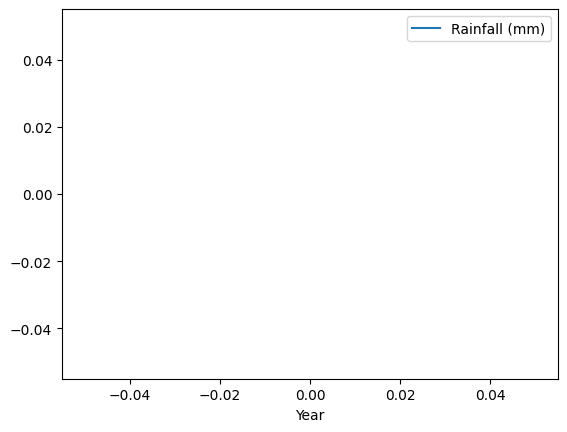

In [166]:
rainfall_df.loc[rainfall_df['Country'] == 'Germany'].groupby('Year').mean().plot()
plt.show()

<ipython-input-167-34bb5e03d4bd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_data = rainfall_df.groupby('Year').mean()


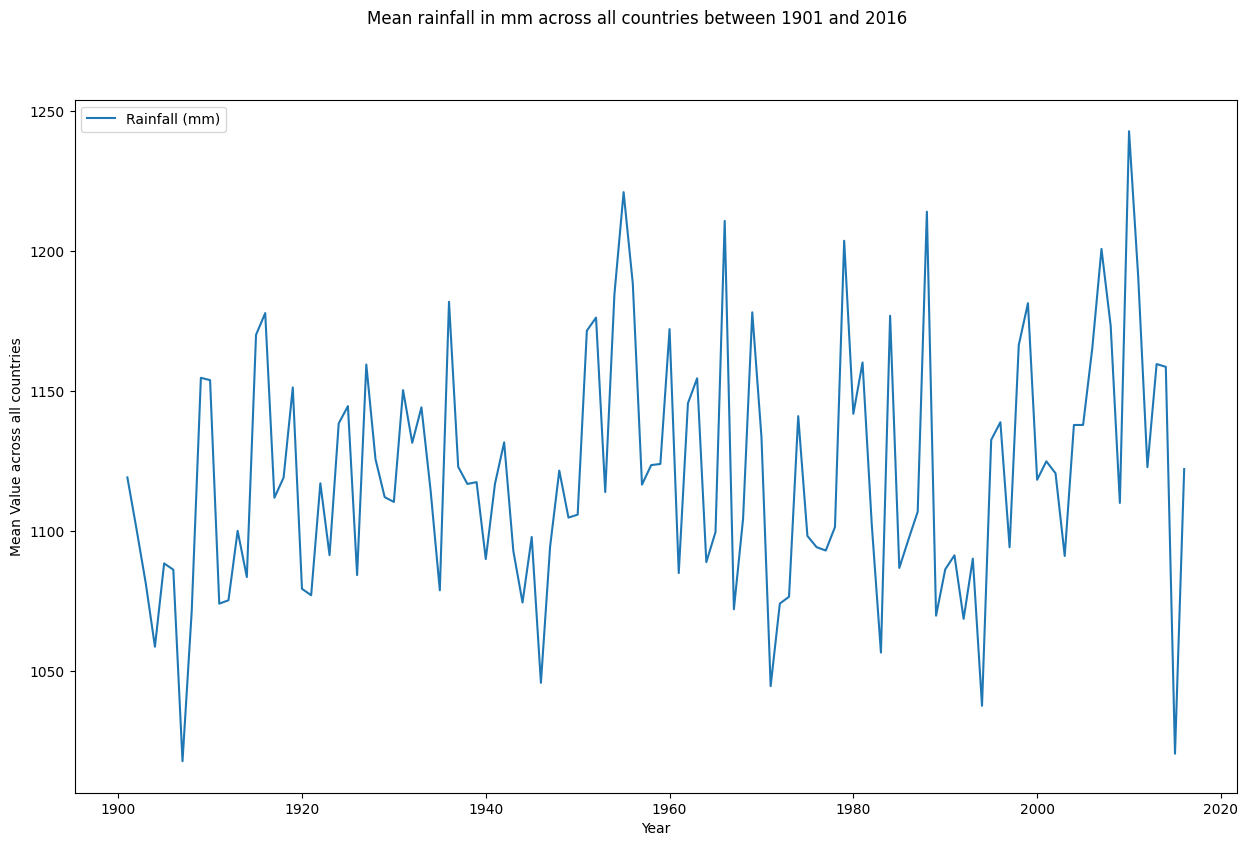

In [167]:
# prepare data
temp_data = rainfall_df.groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean rainfall in mm across all states between 1901 and 2016')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all states')
ax.set_xlabel('Year')

plt.show()

## Temperature data

<ipython-input-168-243d8d7a6fbc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temperature_df.loc[temperature_df['Country'] == 'Germany'].groupby('Year').mean().plot()


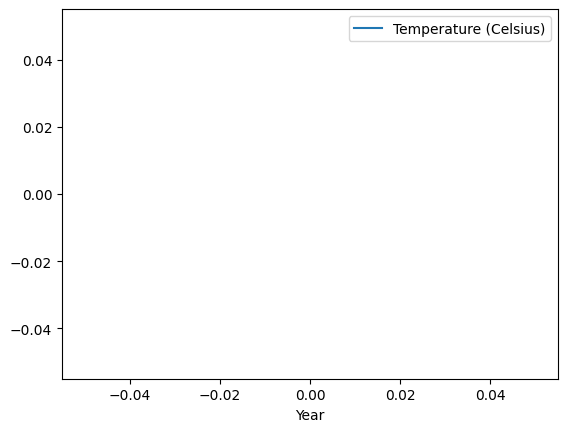

In [168]:
temperature_df.loc[temperature_df['Country'] == 'Germany'].groupby('Year').mean().plot()
plt.show()

<ipython-input-169-5bdd2a869449>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_data = temperature_df.groupby('Year').mean()


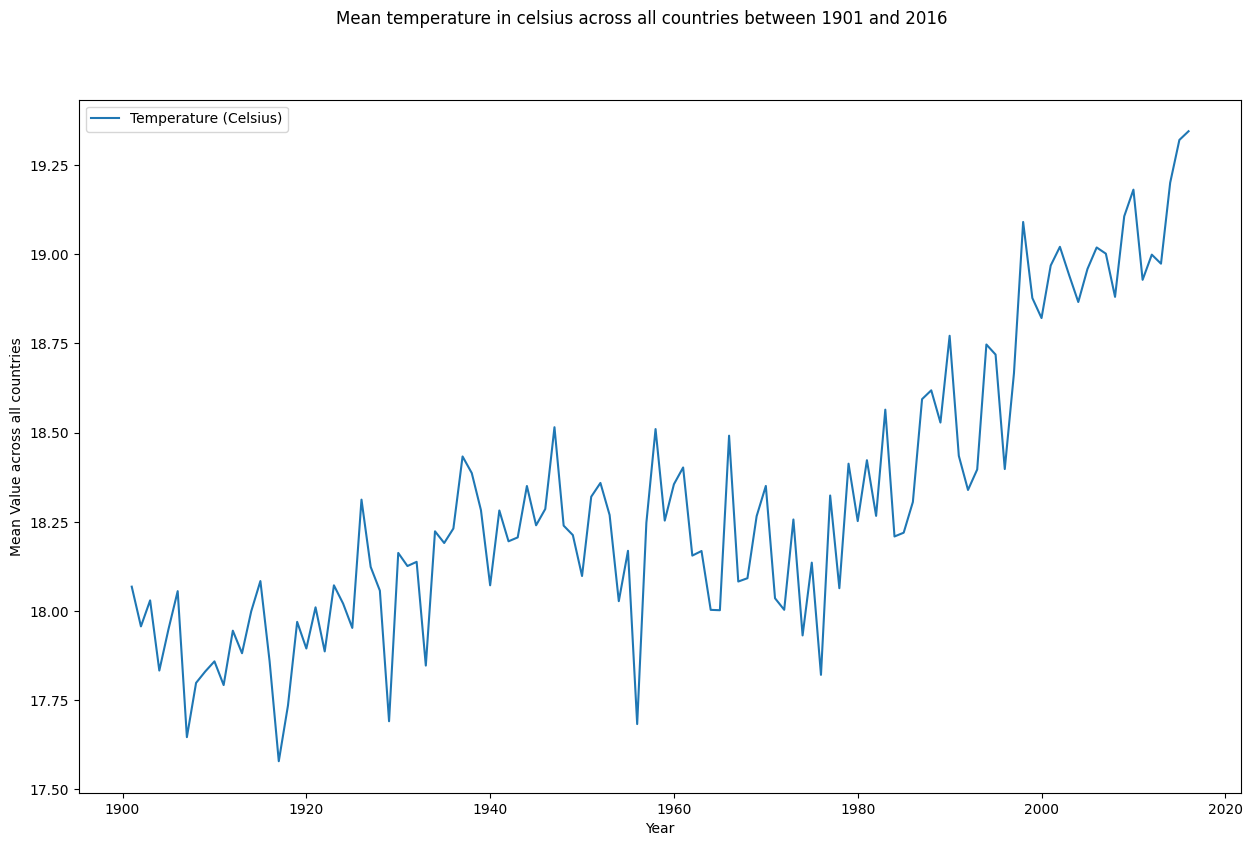

In [169]:
# prepare data
temp_data = temperature_df.groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean temperature in celsius across all states between 1901 and 2016')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all states')
ax.set_xlabel('Year')

plt.show()

## Yield data

<ipython-input-170-4eef7b02f436>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yield_mean = yield_data.groupby(['Year', 'Item']).mean()


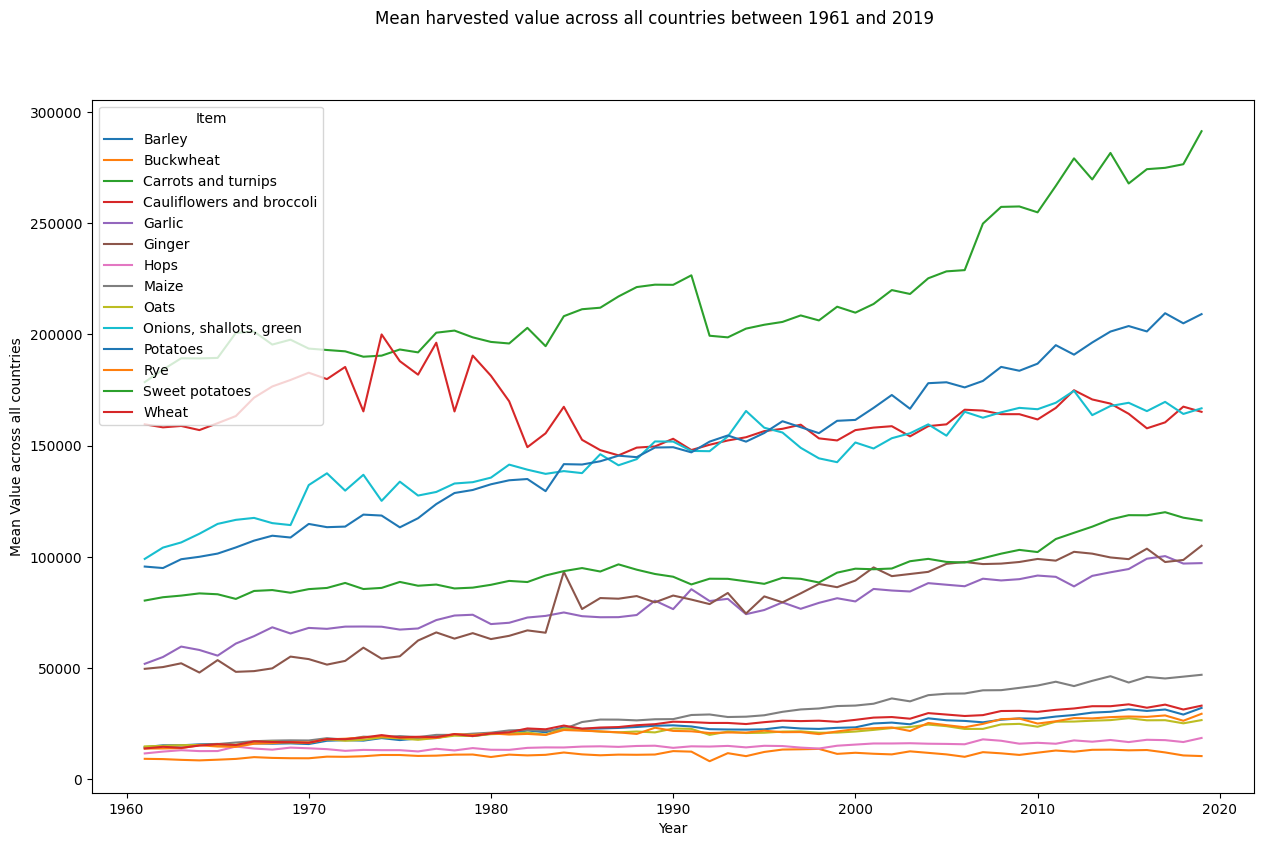

In [170]:
# prepare data
yield_mean = yield_data.groupby(['Year', 'Item']).mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean harvested value across all states between 1961 and 2019')

yield_mean['Value'].unstack().plot(ax=ax)

ax.set_ylabel('Mean Value across all states')
ax.set_xlabel('Year')

plt.show()

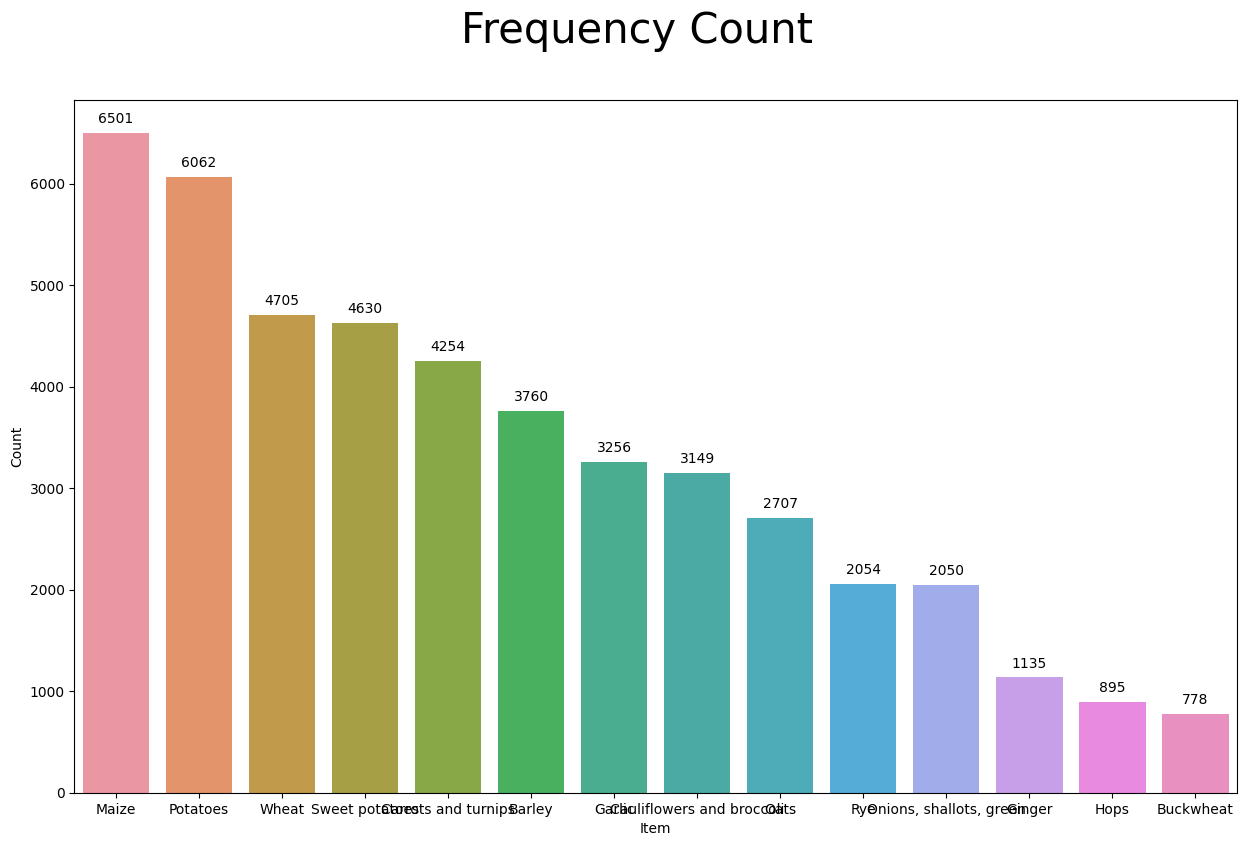

In [171]:
fig, axs = plt.subplots(1,1, figsize=(15,9))
fig.suptitle('Frequency Count', size=30)

temp_df = yield_data['Item'].value_counts().to_frame().reset_index()
g = sns.barplot(x='index', y='Item', data=temp_df, orient='v', ax=axs)

for index, row in temp_df.iterrows():
    g.text(row.name,row.Item + 100, row.Item, color='black', ha="center")

axs.set_xlabel('Item')
axs.set_ylabel('Count')

fig.show()

## Pesticide data

<ipython-input-172-93995caaa2c5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pesticides_df.loc[temperature_df['Country'] == 'Germany'].groupby('Year').mean().plot()


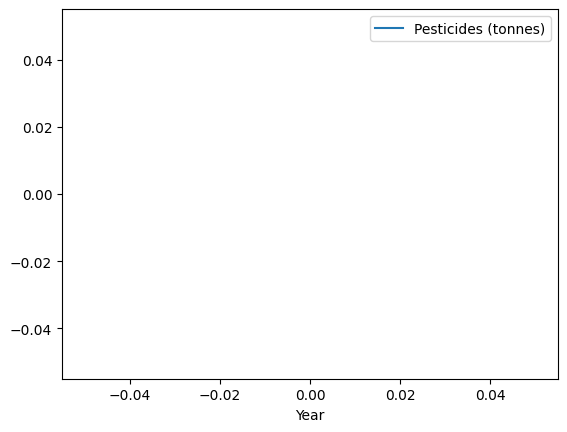

In [172]:
pesticides_df.loc[temperature_df['Country'] == 'Germany'].groupby('Year').mean().plot()
plt.show()

<ipython-input-173-c5349d055b0f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_data = pesticides_df.groupby('Year').mean()


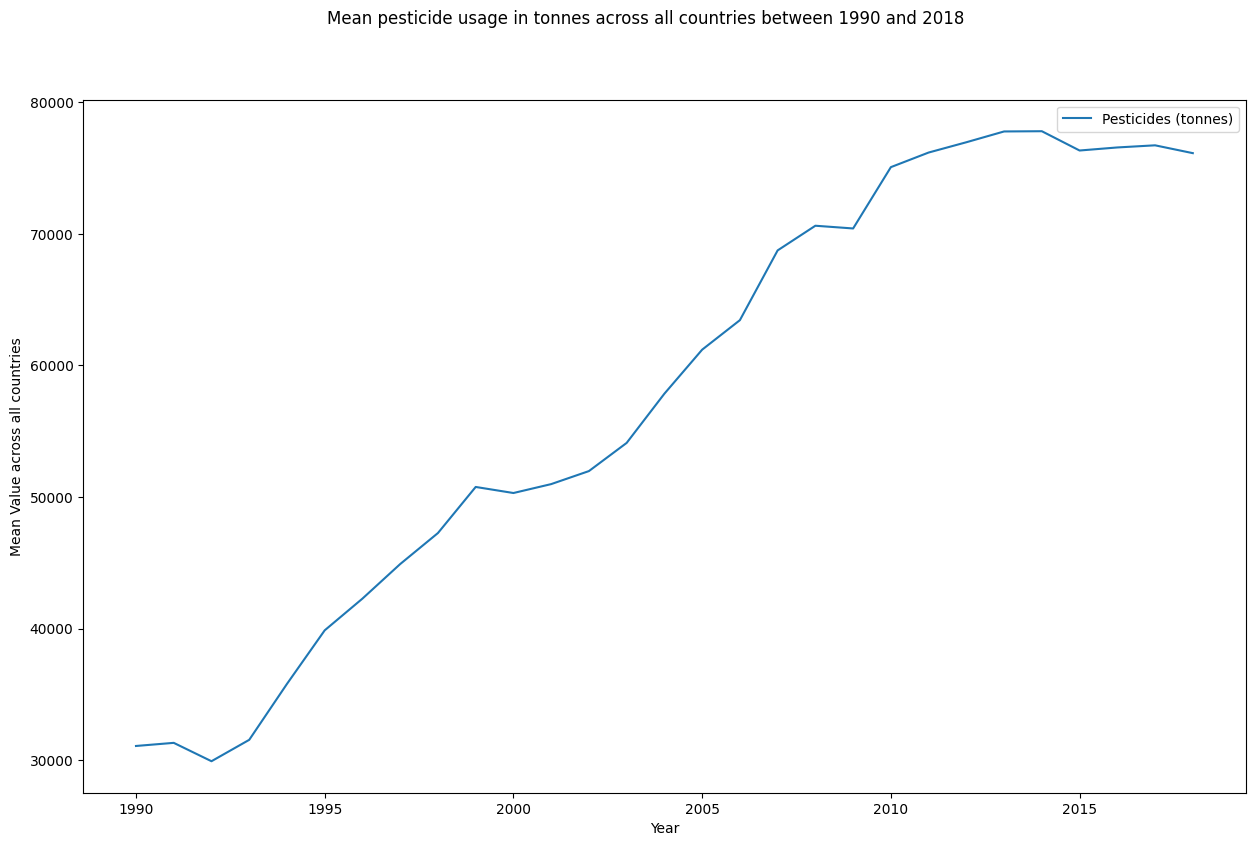

In [173]:
# prepare data
temp_data = pesticides_df.groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean pesticide usage in tonnes across all states between 1990 and 2018')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all states')
ax.set_xlabel('Year')

plt.show()

## Merged data

<ipython-input-174-5eb7488522f7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_data = data.groupby(['Year', 'Item']).mean()


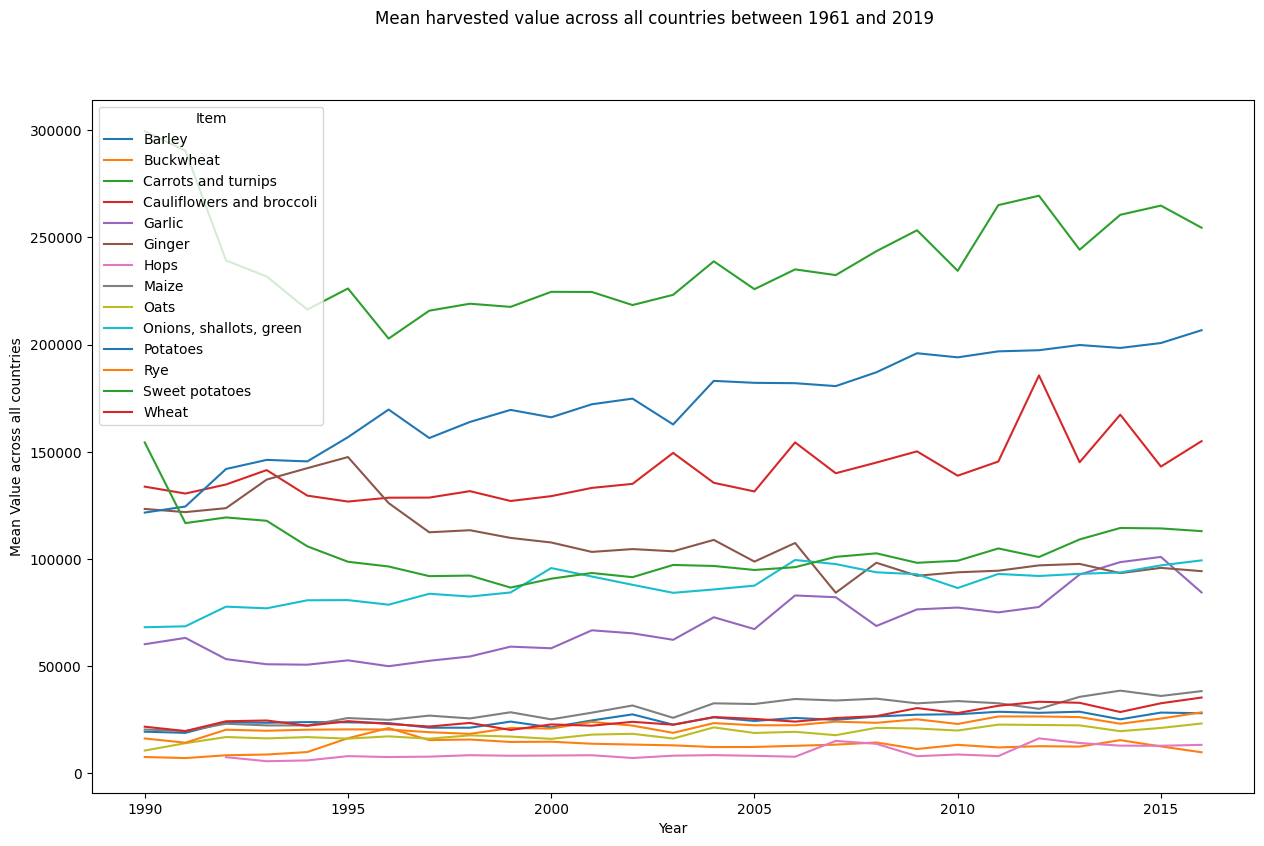

In [174]:
# prepare data
temp_data = data.groupby(['Year', 'Item']).mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean harvested value across all states between 1961 and 2019')

temp_data['Yield (hg/ha)'].unstack().plot(ax=ax)

ax.set_ylabel('Mean Value across all states')
ax.set_xlabel('Year')

plt.show()

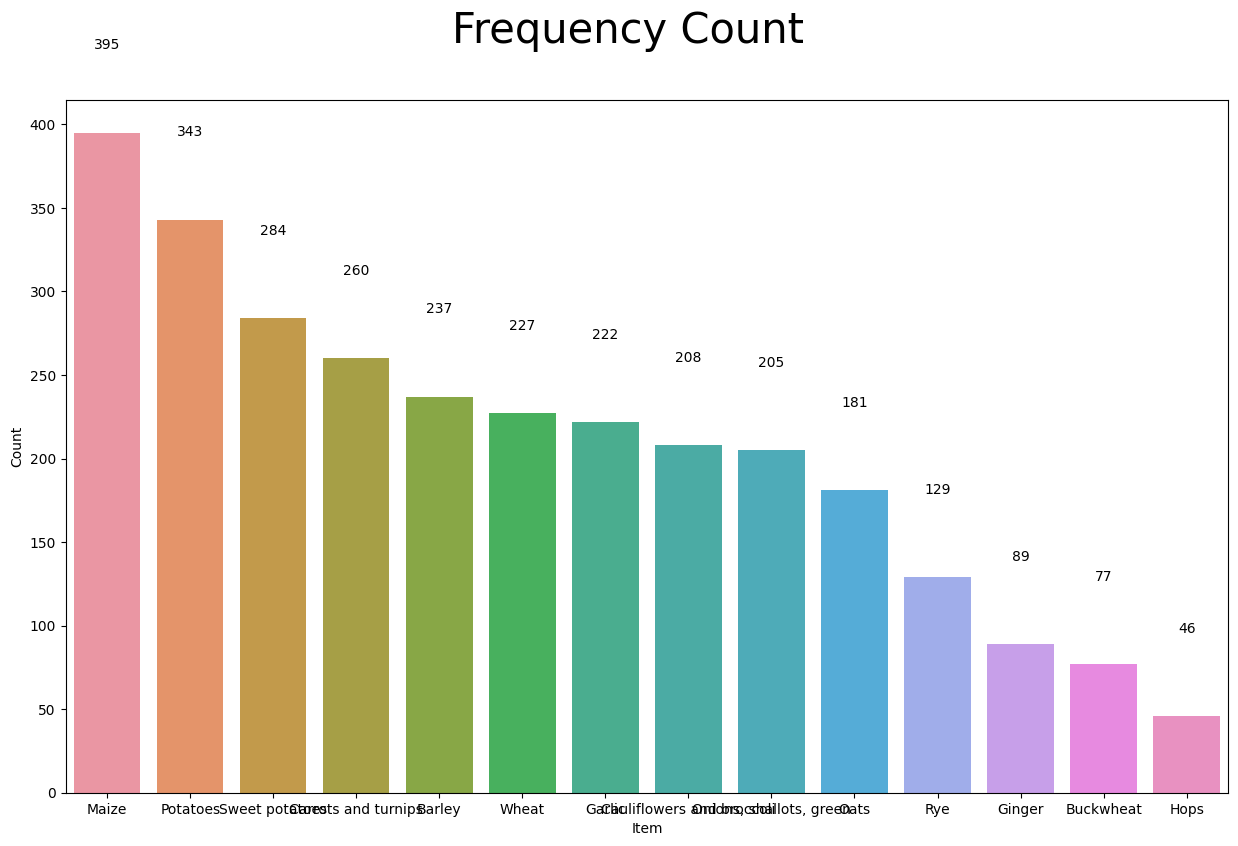

In [175]:
fig, axs = plt.subplots(1,1, figsize=(15,9))
fig.suptitle('Frequency Count', size=30)

temp_df = data['Item'].value_counts().to_frame().reset_index()
g = sns.barplot(x='index', y='Item', data=temp_df, orient='v', ax=axs)

for index, row in temp_df.iterrows():
    g.text(row.name,row.Item + 50, row.Item, color='black', ha="center")

axs.set_xlabel('Item')
axs.set_ylabel('Count')

fig.show()

<ipython-input-176-4b9532546031>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


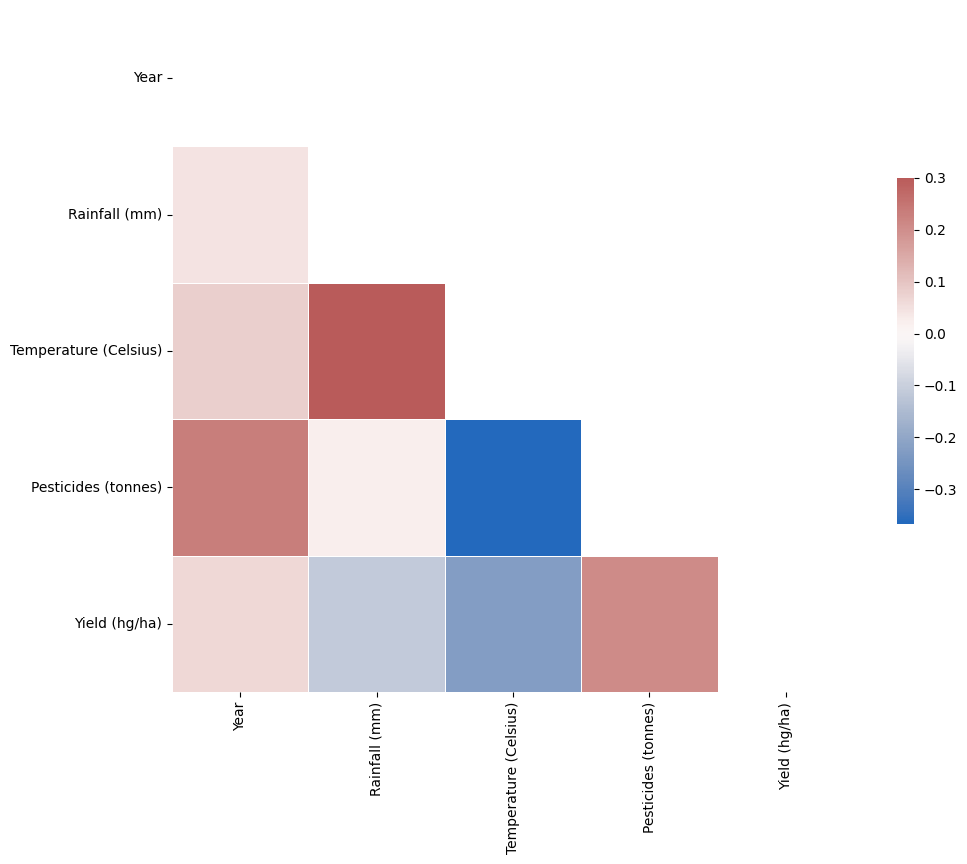

In [176]:
corr = data.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

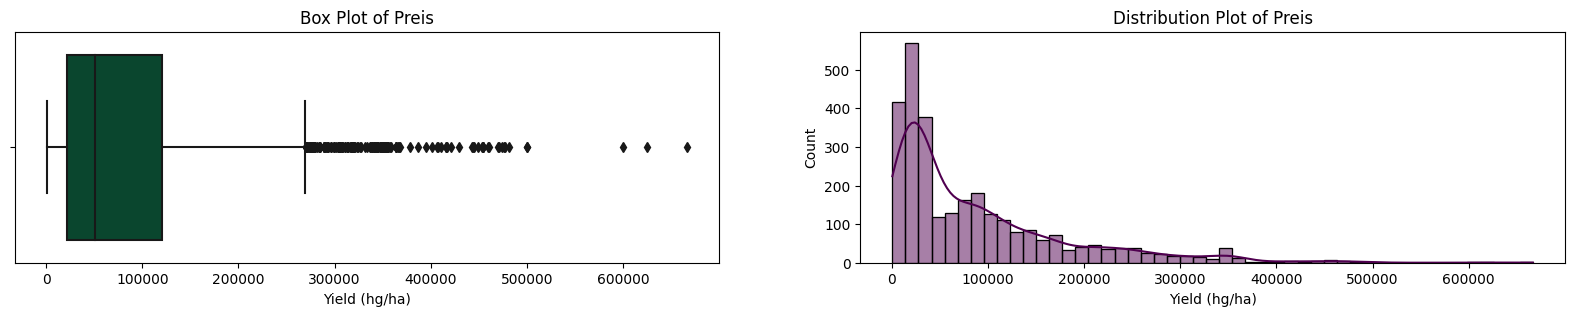

In [177]:
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(x=data['Yield (hg/ha)'],color='#005030')
plt.title(f'Box Plot of Preis')

plt.subplot(1,2,2)
sns.histplot(x=data['Yield (hg/ha)'], color='#500050', kde=True)
plt.title(f'Distribution Plot of Preis')
plt.show()

# Data Preprocessing

## One Hot Encoding

In [178]:
data.shape

(2903, 7)

In [179]:
from sklearn.preprocessing import OneHotEncoder

df_onehot = pd.get_dummies(data, columns=['Country', 'Item'], prefix=['Country', 'Item'])
data = df_onehot.loc[:, df_onehot.columns != 'Yield (hg/ha)']
data['Yield (hg/ha)'] = df_onehot['Yield (hg/ha)']

In [180]:
data.shape

(2903, 23)

## Backward Elimination

In [181]:
data.shape

(2903, 23)

In [182]:
import statsmodels.api as sm

y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break

data = data[cols]
data.insert(len(data.columns), 'Yield (hg/ha)', y)

In [183]:
data.shape

(2903, 20)

## Removing of Outliers

In [184]:
data.shape

(2903, 20)

In [185]:
from scipy import stats

y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 11).all(axis=1)
X = X[filtered_entries]

X.insert(len(X.columns), 'Yield (hg/ha)', y)
data = X

In [186]:
data.shape

(2903, 20)

## Feature Scaling

In [187]:
data.shape

(2903, 20)

In [188]:
from sklearn.preprocessing import MinMaxScaler

y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

scaler = MinMaxScaler()
data_without_yield = pd.DataFrame(scaler.fit_transform(X), index=y.index)
data_without_yield.columns = X.columns
data_without_yield.insert(len(data_without_yield.columns), 'Yield (hg/ha)', y)

data = data_without_yield

In [189]:
data.shape

(2903, 20)

# Modeling

In [190]:
y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [192]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [193]:
def plot_regression_results(ax, y_test, y_pred, title, estimated_time, scores):

  # linear least-squares
  slope, intercept, rvalue, pvalue, stderr = linregress(y_test, y_pred)
  ax.plot([y_test.min(), y_test.max()], [intercept+y_test.min()*slope, intercept+y_test.max()*slope], '--r')

  ax.scatter(y_test, y_pred, alpha=0.7)

  extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
  ax.legend([extra], [scores], loc='upper left')

  ax.set_xlabel('Actual values in tonnes')
  ax.set_ylabel('Predictes values in tonnes')
  ax.set_title('{}\nTrained in {:.2f} Milliseconds'.format(name, estimated_time*1000))

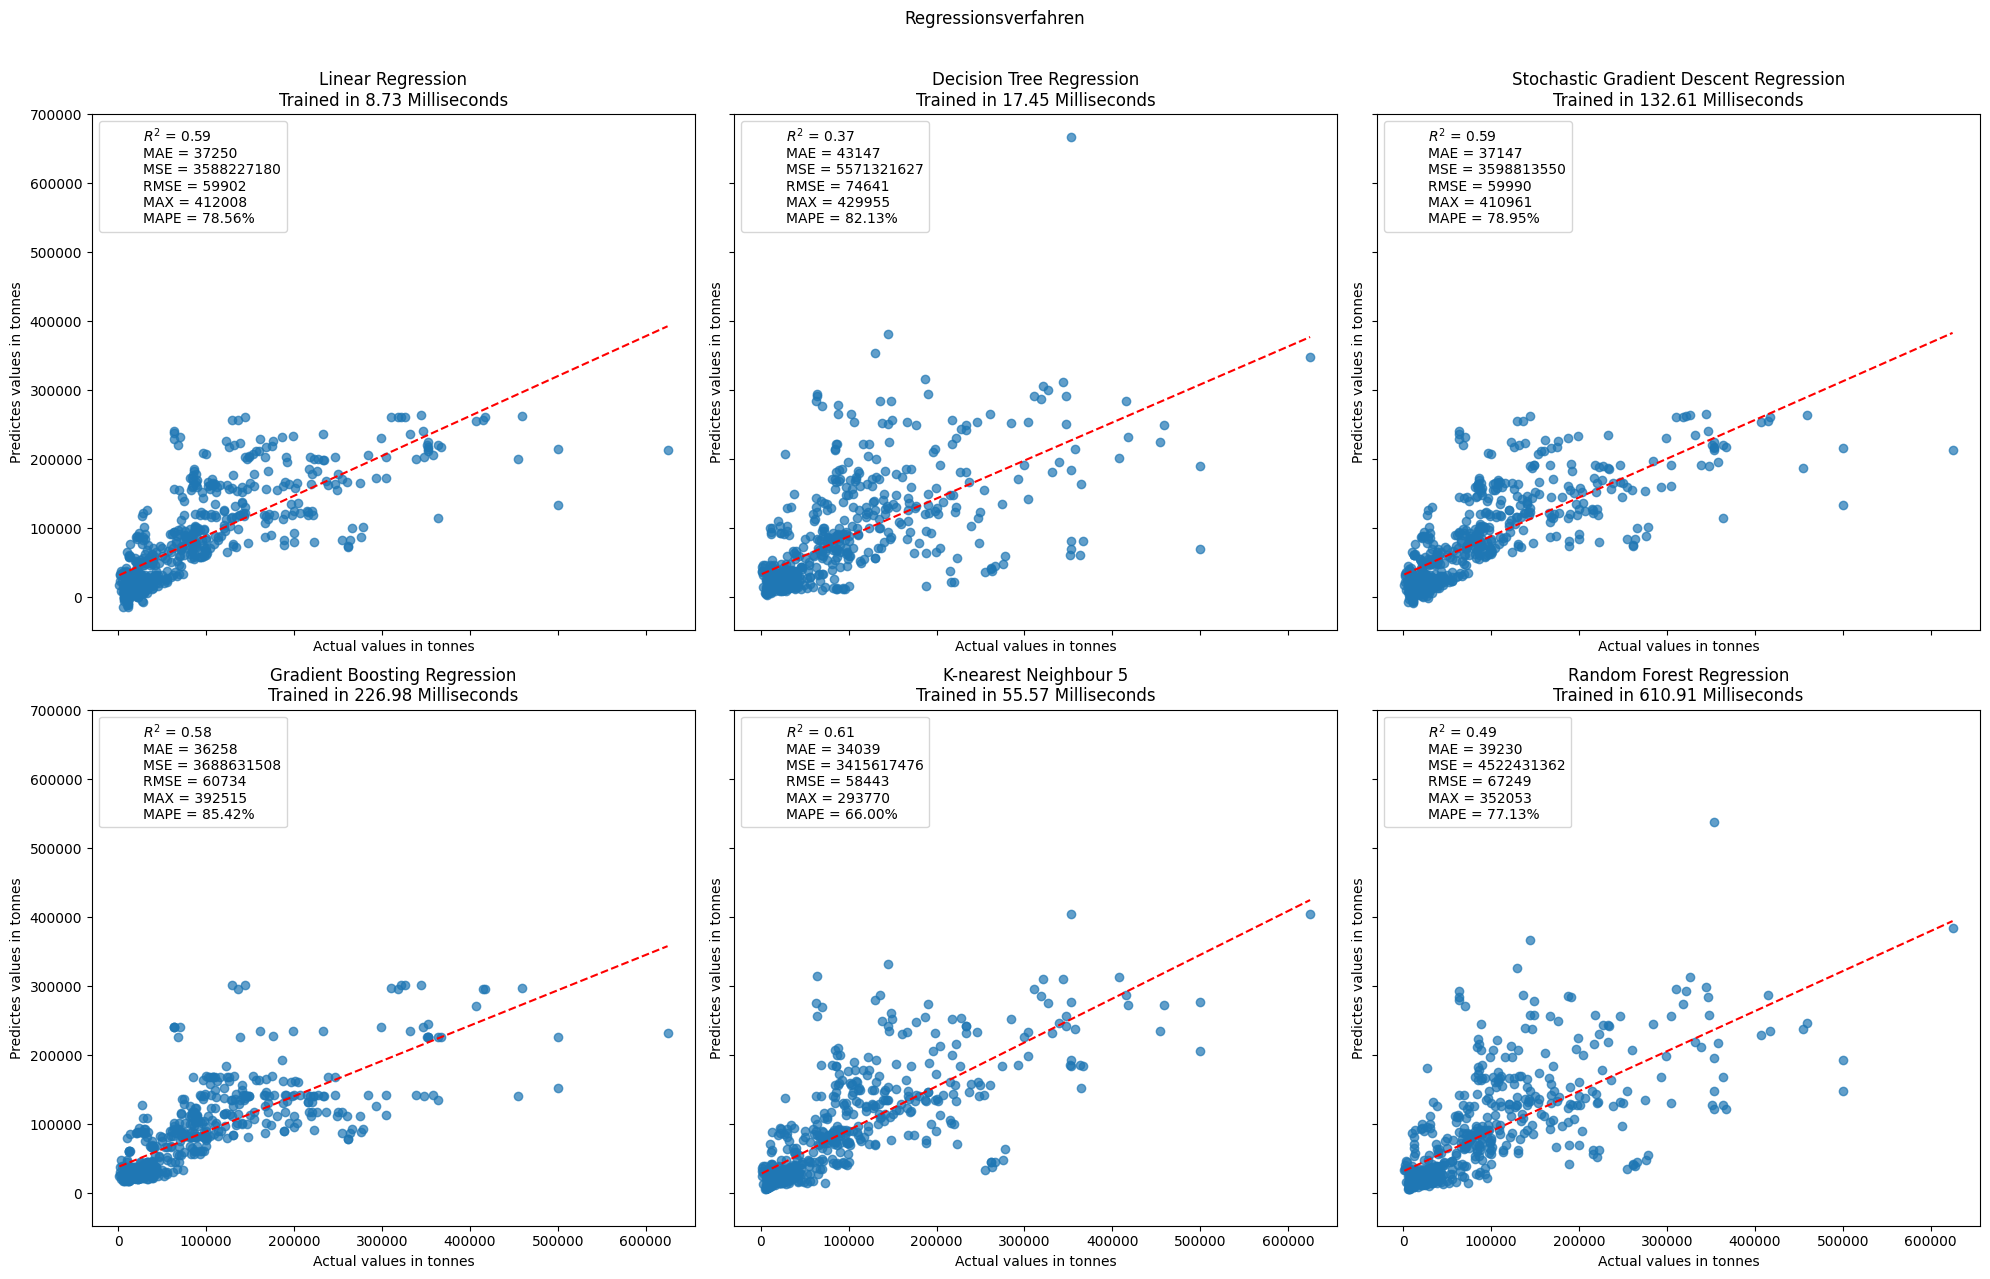

In [196]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

import time
from scipy.stats import linregress

lin = LinearRegression()
dtr = DecisionTreeRegressor()
sgd = SGDRegressor(loss='squared_error')
gbr = GradientBoostingRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
rfr = RandomForestRegressor()

estimators = [('Linear Regression', lin),
              ('Decision Tree Regression', dtr),
              ('Stochastic Gradient Descent Regression', sgd),
              ('Gradient Boosting Regression', gbr),
              ('K-nearest Neighbour 5', knn),
              ('Random Forest Regression', rfr)]

fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(20, 13))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators):
  start_time = time.time()
  est.fit(X_train, y_train)
  y_pred = est.predict(X_test)
  estimated_time = time.time() - start_time

  plot_regression_results(ax, y_test, y_pred, name, estimated_time,
                          (r'$R^2$ = {:.2f}' + '\n' +
                          r'MAE = {:.0f}' + '\n' +
                          r'MSE = {:.0f}' + '\n' +
                          r'RMSE = {:.0f}' + '\n' +
                          r'MAX = {:.0f}' + '\n' +
                          r'MAPE = {:.2f}%')
                          .format(r2_score(y_test, y_pred),
                                  mean_absolute_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred, squared=False),
                                  max_error(y_test, y_pred),
                                  mean_absolute_percentage_error(y_test, y_pred)))

plt.suptitle('Regressionsverfahren')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

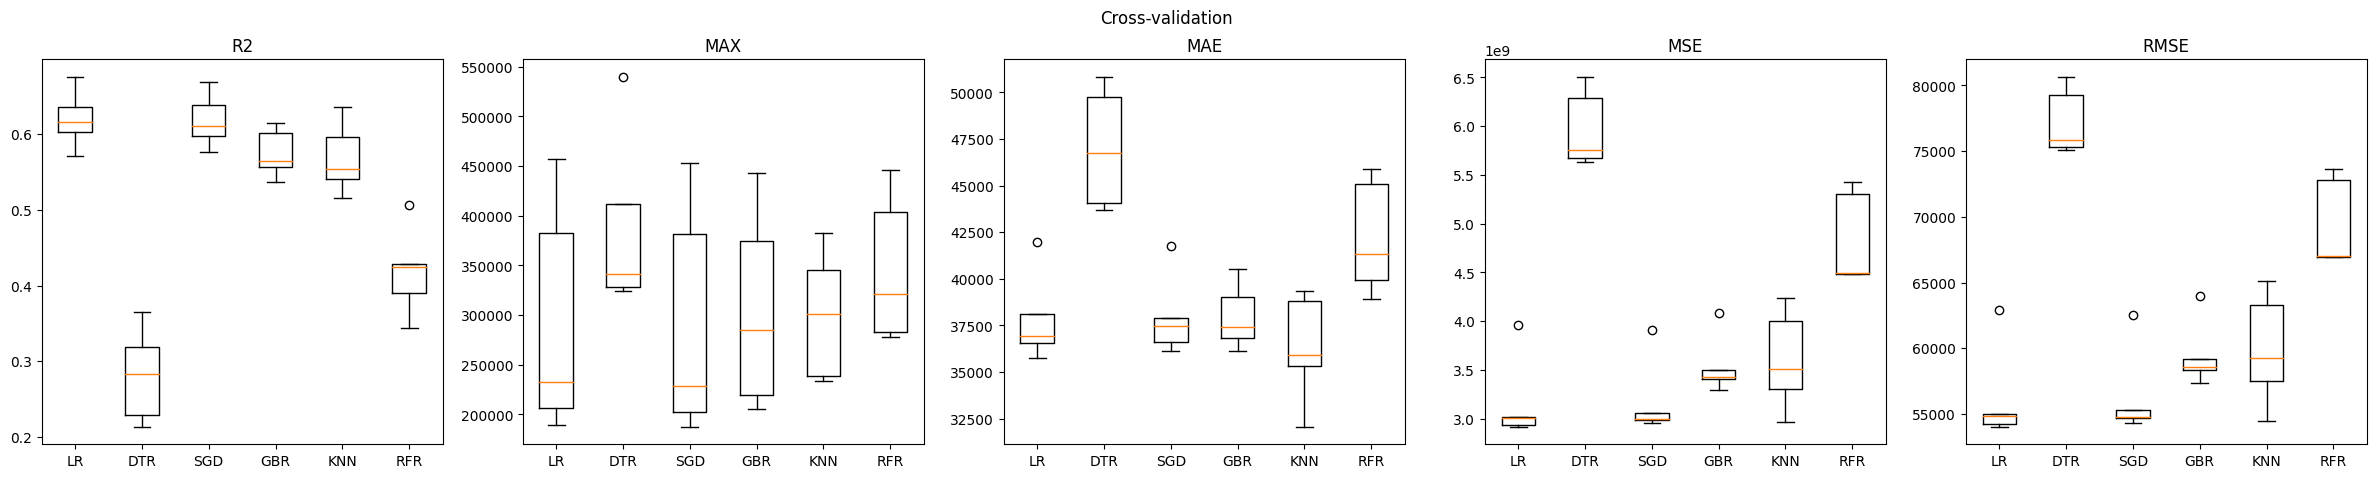

In [197]:
r2_values = []
max_error_values = []
neg_mean_absolute_error_values = []
neg_mean_squared_error_values = []
neg_root_mean_squared_error_values = []

for name, est in estimators:

  score = cross_validate(est, X_train, y_train, cv=5,
                         scoring=['r2', 'max_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'],
                         n_jobs=-1)

  r2_values.append(score['test_r2'])
  max_error_values.append(-score['test_max_error'])
  neg_mean_absolute_error_values.append(-score['test_neg_mean_absolute_error'])
  neg_mean_squared_error_values.append(-score['test_neg_mean_squared_error'])
  neg_root_mean_squared_error_values.append(-score['test_neg_root_mean_squared_error'])


fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(30, 5))

names = ['LR', 'DTR', 'SGD', 'GBR', 'KNN', 'RFR']

axs[0].boxplot(r2_values, labels=names)
axs[0].set_title('R2')
axs[1].boxplot(max_error_values, labels=names)
axs[1].set_title('MAX')
axs[2].boxplot(neg_mean_absolute_error_values, labels=names)
axs[2].set_title('MAE')
axs[3].boxplot(neg_mean_squared_error_values, labels=names)
axs[3].set_title('MSE')
axs[4].boxplot(neg_root_mean_squared_error_values, labels=names)
axs[4].set_title('RMSE')

plt.suptitle('Cross-validation')
plt.show()

In [200]:
regression = 5

print(u'R²: {:.3f} \u00B1 {:.3f}'.format(np.mean(r2_values[regression]), np.std(r2_values[regression])))
print(u'MAX: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(max_error_values[regression]), np.std(max_error_values[regression])))
print(u'MAE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_mean_absolute_error_values[regression]), np.std(neg_mean_absolute_error_values[regression])))
print(u'MSE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_mean_squared_error_values[regression]), np.std(neg_mean_squared_error_values[regression])))
print(u'RMSE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_root_mean_squared_error_values[regression]), np.std(neg_root_mean_squared_error_values[regression])))

R²: 0.419 ± 0.053
MAX: 346,253 ± 66,978
MAE: 42,222 ± 2,767
MSE: 4,838,385,028 ± 432,699,232
RMSE: 69,490 ± 3,084


In [199]:
from sklearn.tree import export_graphviz
import pydot

tree = rfr.estimators_[5]

export_graphviz(tree, out_file = 'tree.dot', feature_names = data.columns[:-1], rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')